# must use spinor as MILOS RFs are tau integrated

- use maprf
- first test HSRA.dat file

  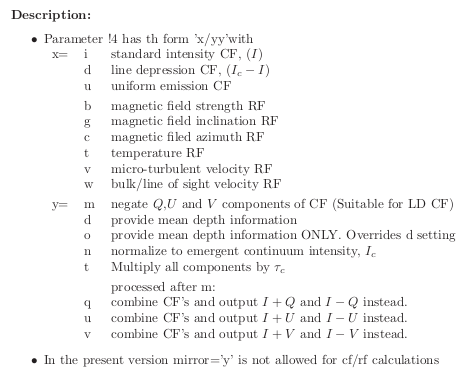

In [18]:
from astropy.io import fits
from blos_binning_helper import *
import matplotlib.pyplot as plt

In [32]:
#250G HSRA atmosphere
output=fits.getdata('/export/local/scratch/sinjan/spinor_rf/6173_250G_HSRA/inverted_atmos_maprf.1.1.fits')

In [43]:
hdr=fits.getheader('/export/local/scratch/sinjan/spinor_rf/6173_250G_HSRA/inverted_atmos_maprf.1.1.fits')

In [44]:
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    6 / number of data axes                            
NAXIS1  =                  251 / length of data axis 1                          
NAXIS2  =                   77 / length of data axis 2                          
NAXIS3  =                    4 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
NAXIS5  =                    1 / length of data axis 5                          
NAXIS6  =                   10 / length of data axis 6                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CODE    = 'SPINOR  '        

In [33]:
output.shape

(10, 1, 1, 4, 77, 251)

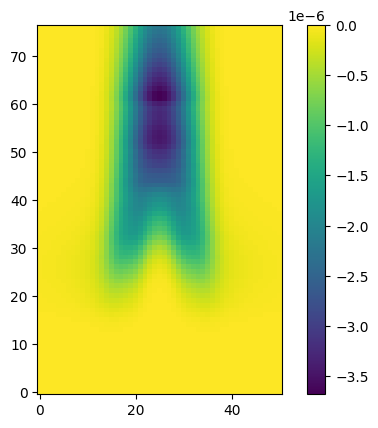

In [34]:
plt.figure()
plt.imshow(output[0,0,0,0,::-1,100:151],origin="lower")
plt.colorbar()
plt.show()

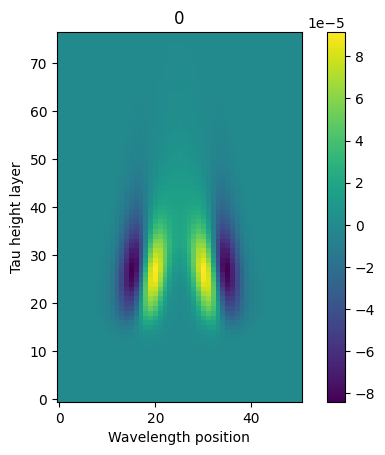

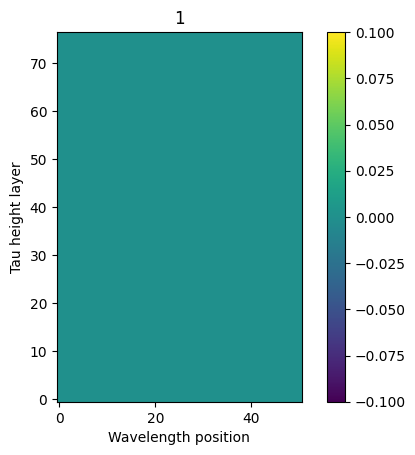

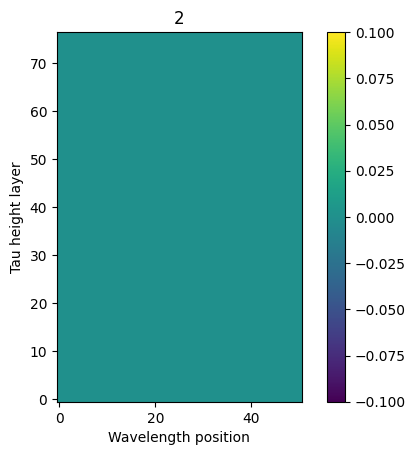

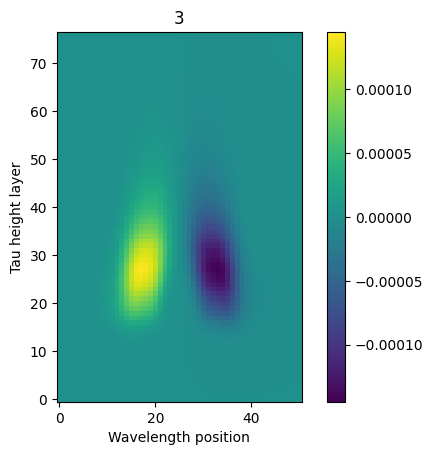

In [49]:
for i in range(4):
    plt.figure()
    plt.imshow(output[7,0,0,i,::-1,100:151],origin="lower")
    plt.ylabel('Tau height layer')
    plt.xlabel('Wavelength position')
    plt.colorbar()
    plt.title(f'{i}')
    plt.show()

In [63]:
files=['eosP','eosT','result_0','result_1','result_2','result_3','result_4','result_5','result_6','result_7']
rfdir='/export/local/scratch/sinjan/spinor_rf/6173_MURaM_200G/'
fwddir='/export/local/scratch/sinjan/spinor_fwd/ngrey_200G/200000/6173_masi_theta00/'

In [64]:
for f in files:
    with fits.open(fwddir+f+'.200000.fits') as hdul:
        hdr = fits.Header()
        hdr['NAXIS1']=36, ' length of data axis 1'
        hdr['NAXIS2']=100, ' length of data axis 2'
        hdr['NAXIS3']=36, ' length of data axis 3'
        hdr['T_X']=np.float32(36*2083333.3333333333), ' Total x (vertical) size [cm]'
        hdr['T_Y']=np.float32(100*1400000.0), ' Total y (vertical) size [cm]'
        hdr['T_Z']=np.float32(36*2083333.3333333333), ' Total z (vertical) size [cm]'
        fits.writeto(rfdir+f+'.200000.fits',hdul[0].data[:36,:,:36], hdr,overwrite=True)

In [56]:
33180480/521280

63.651933701657455

In [58]:
hdr_temp=fits.getheader('/export/local/scratch/sinjan/spinor_fwd/ngrey_200G/200000/6173_masi_theta00/result_0.200000.fits')

In [59]:
hdr_temp

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  288 / length of data axis 1                          
NAXIS2  =                  100 / length of data axis 2                          
NAXIS3  =                  288 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
T_X     =              6.0E+08 / Total X size [cm]                              
T_Y     =              1.4E+08 / Total y (vertical) size [cm]                   
T_Z     =              6.0E+08 / Total z size [cm]                              
TIME    =             61965.

In [61]:
1.4e8/100

1400000.0

In [170]:
output=fits.getdata('/export/local/scratch/sinjan/spinor_rf/6173_MURaM_200G/inverted_atmos_maprf.1.1.fits')

In [171]:
output.shape

(10, 36, 36, 4, 77, 51)

In [172]:
output=output[:,:,:,:,::-1,:]
output=output[:,:,:,:,1:,:]

0 0


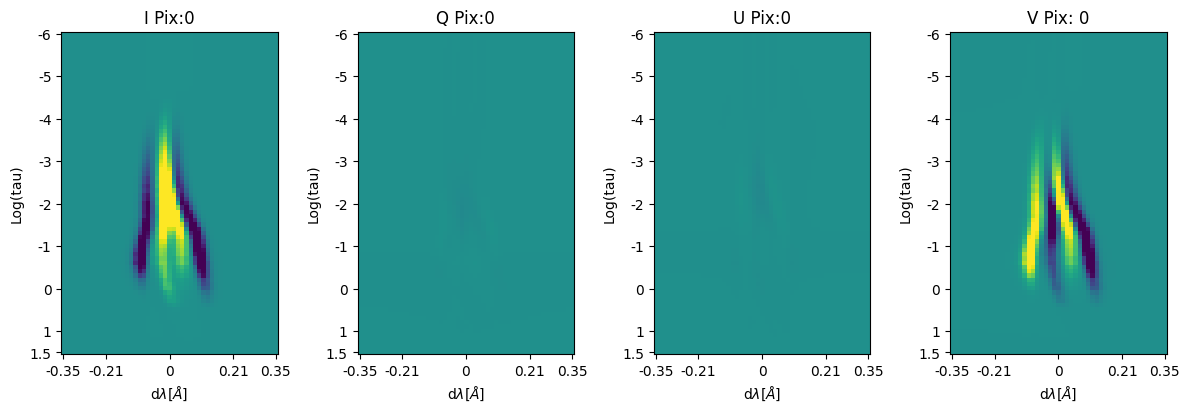

1 0


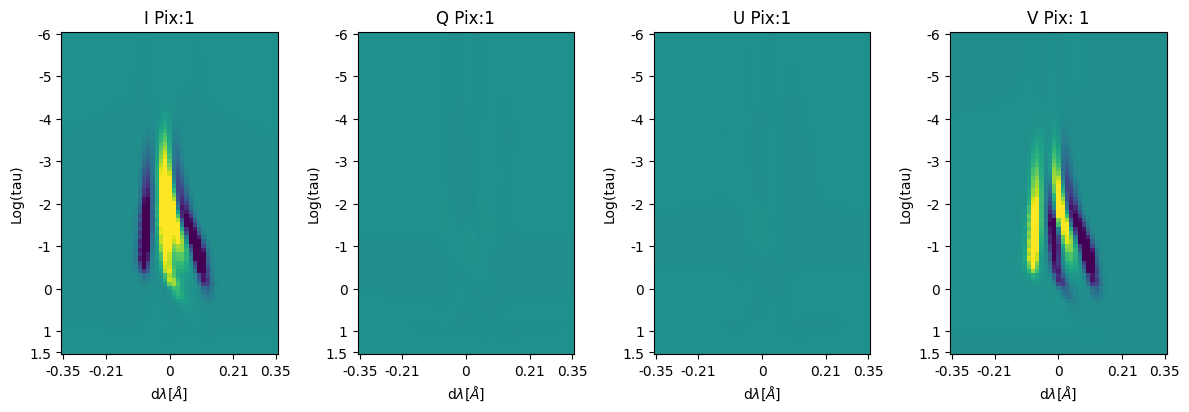

2 0


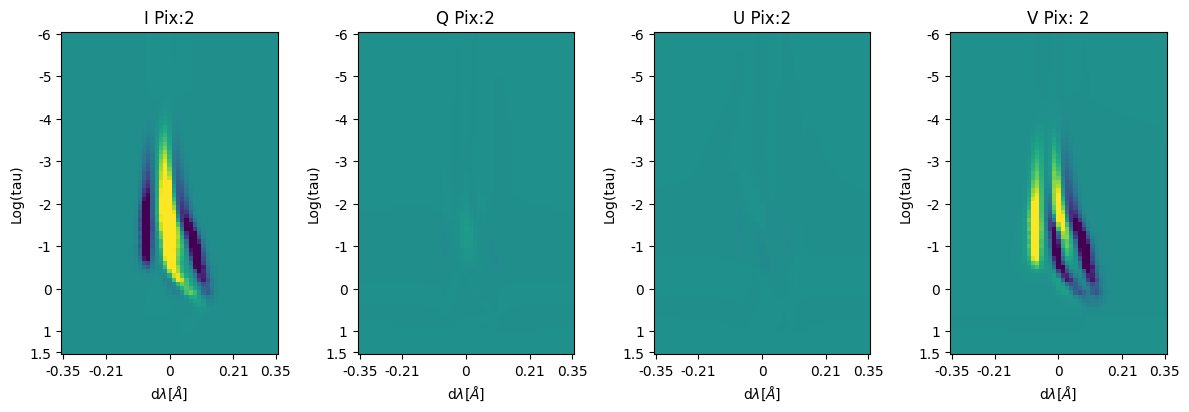

3 0


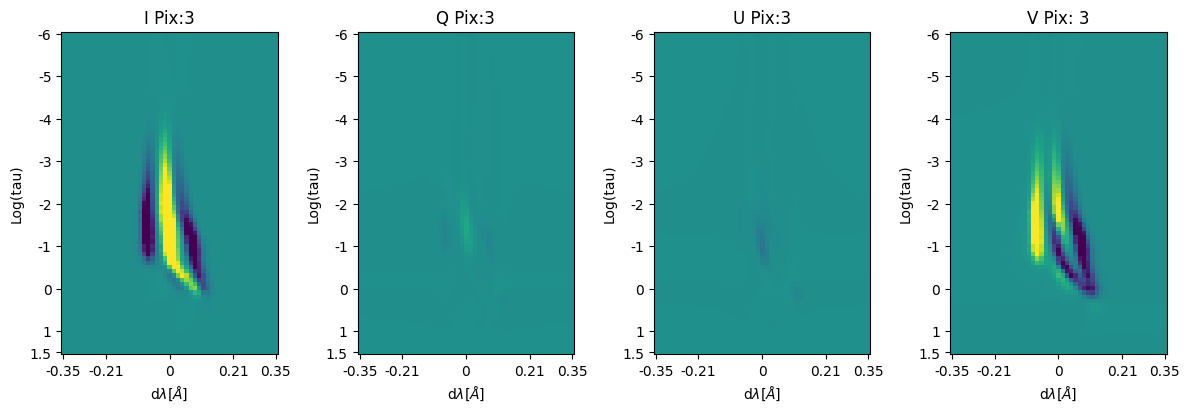

4 0


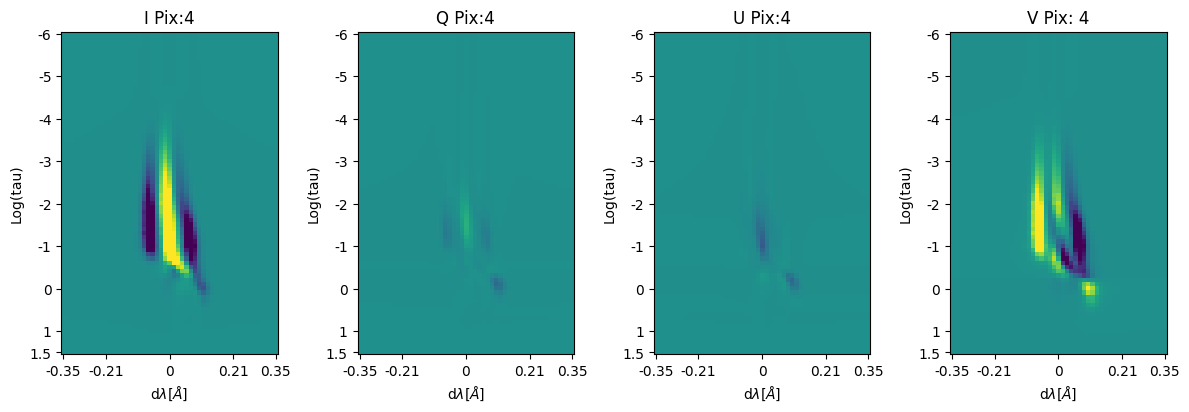

In [85]:
s=['I','Q','U','V']
cmax=0.5e-4

tau_range = np.linspace(-6,1.5,76)
tickloc=[0,5,15,25,35,45,55,65,75]
labels=['1.5','1','0','-1','-2','-3','-4','-5','-6']

xtickloc=[0,10,25,40,50]
xlabels=['-0.35','-0.21','0','0.21','0.35']
for i in range(5):
    x=i//36
    y=i%36
    print(y,x)
    plt.figure(figsize=(12,5))
    plt.subplot(141)
    plt.imshow(output[7,y,x,0,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'I Pix:{i}')

    plt.subplot(142)
    plt.imshow(output[7,y,x,1,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'Q Pix:{i}')

    plt.subplot(143)
    plt.imshow(output[7,y,x,2,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'U Pix:{i}')

    plt.subplot(144)
    plt.imshow(output[7,y,x,3,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'V Pix: {i}')
    plt.tight_layout()
    plt.show()

In [86]:
output[7,:,:,3,:,:].shape

(36, 36, 76, 51)

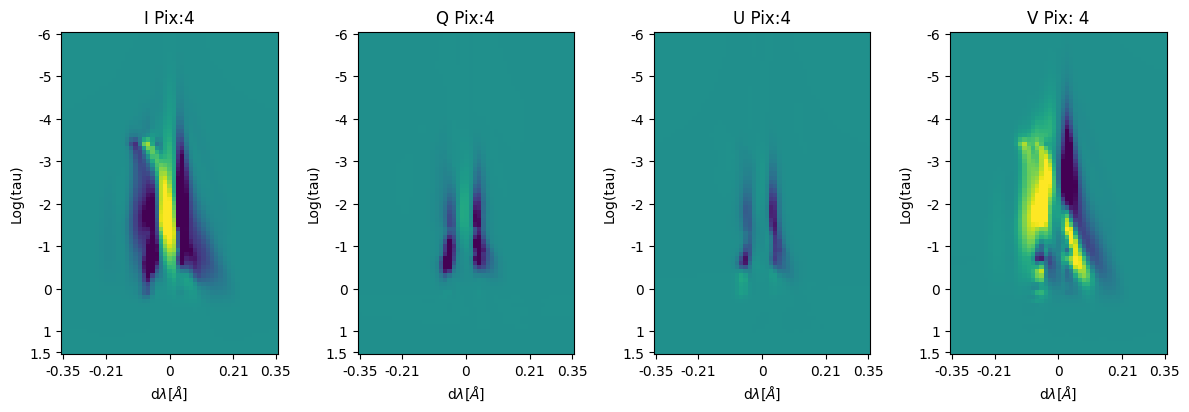

In [91]:
# avg over all pixels
avgd=output[7,:,:,:,:,:].mean(axis=(0,1))
cmax=1e-5
plt.figure(figsize=(12,5))
plt.subplot(141)
plt.imshow(avgd[0],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'I Pix:{i}')

plt.subplot(142)
plt.imshow(avgd[1],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'Q Pix:{i}')

plt.subplot(143)
plt.imshow(avgd[2],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'U Pix:{i}')

plt.subplot(144)
plt.imshow(avgd[3],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'V Pix: {i}')
plt.tight_layout()
plt.show()

## following Borrero et al 2014

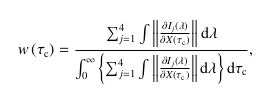

In [173]:
avg_xy=output[7,:,:,:,:,:].mean(axis=(0,1))
int_wave=np.sum(np.abs(avg_xy)*0.014,axis=-1)
int_tau=np.sum(int_wave*0.1,axis=-1)
weighted_response_function=int_wave/int_tau[...,np.newaxis]

In [105]:
weighted_response_function.shape

(4, 4, 76)

In [98]:
int_wave.shape

(4, 76)

In [107]:
int_tau[...,np.newaxis].shape

(4, 1)

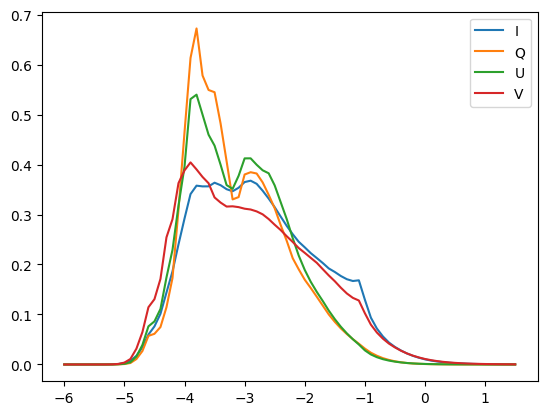

In [114]:
plt.figure()
plt.plot(tau_range,weighted_response_function[0,:],label='I')
plt.plot(tau_range,weighted_response_function[1,:],label='Q')
plt.plot(tau_range,weighted_response_function[2,:],label='U')
plt.plot(tau_range,weighted_response_function[3,:],label='V')
plt.legend()

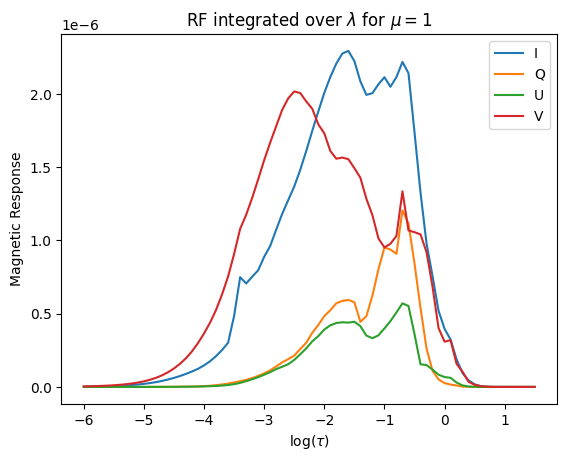

In [163]:
plt.figure()
plt.plot(tau_range[::-1],int_wave[0,:],label='I')
plt.plot(tau_range[::-1],int_wave[1,:],label='Q')
plt.plot(tau_range[::-1],int_wave[2,:],label='U')
plt.plot(tau_range[::-1],int_wave[3,:],label='V')
plt.xlabel(r'$\log(\tau)$')
plt.ylabel('Magnetic Response')
plt.title(r'RF integrated over $\lambda$ for $\mu=1$')
plt.legend()
plt.savefig('./plots/rf_mu1.png',dpi=300,bbox_inches='tight')

In [195]:
avg_xy=output[7,:5,:5,:,:,:].mean(axis=(0,1))
int_wave=np.sum(np.abs(avg_xy)*0.014,axis=-1)
int_tau=np.sum(int_wave*0.1,axis=-1)
weighted_response_function=int_wave/int_tau[...,np.newaxis]

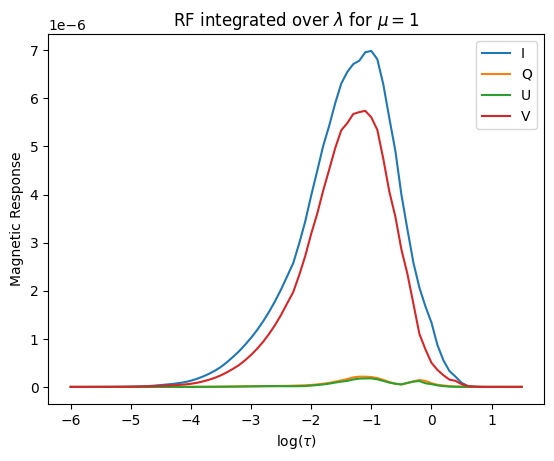

In [197]:
plt.figure()
plt.plot(tau_range[::-1],int_wave[0,:],label='I')
plt.plot(tau_range[::-1],int_wave[1,:],label='Q')
plt.plot(tau_range[::-1],int_wave[2,:],label='U')
plt.plot(tau_range[::-1],int_wave[3,:],label='V')
plt.xlabel(r'$\log(\tau)$')
plt.ylabel('Magnetic Response')
plt.title(r'RF integrated over $\lambda$ for $\mu=1$')
plt.legend()
plt.savefig('./plots/rf_mu1n.png',dpi=300,bbox_inches='tight')

# MU=0.5

In [198]:
output=fits.getdata('/export/local/scratch/sinjan/spinor_rf/6173_MURaM_200G_05mu/inverted_atmos_maprf.1.1.fits')

In [199]:
output.shape

(10, 36, 36, 4, 77, 51)

In [200]:
output=output[:,:,:,:,::-1,:]
output=output[:,:,:,:,1:,:]

0 0


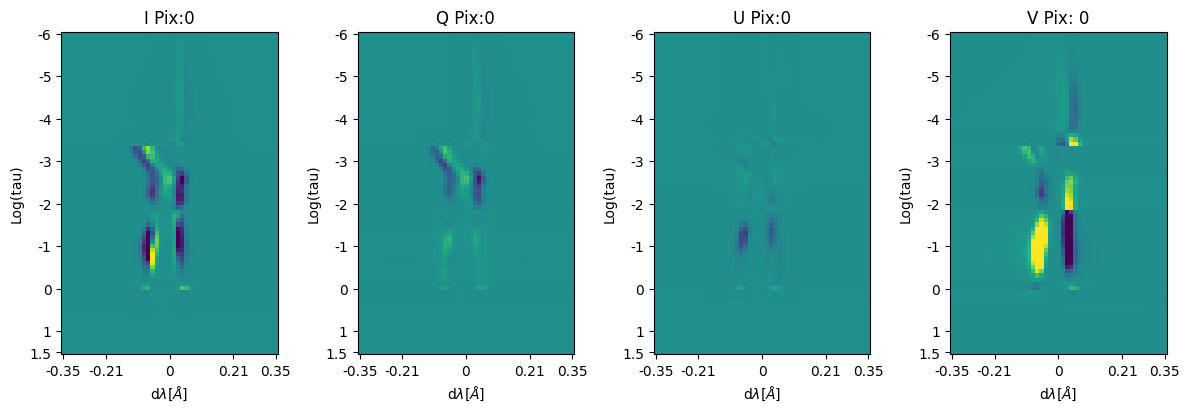

1 0


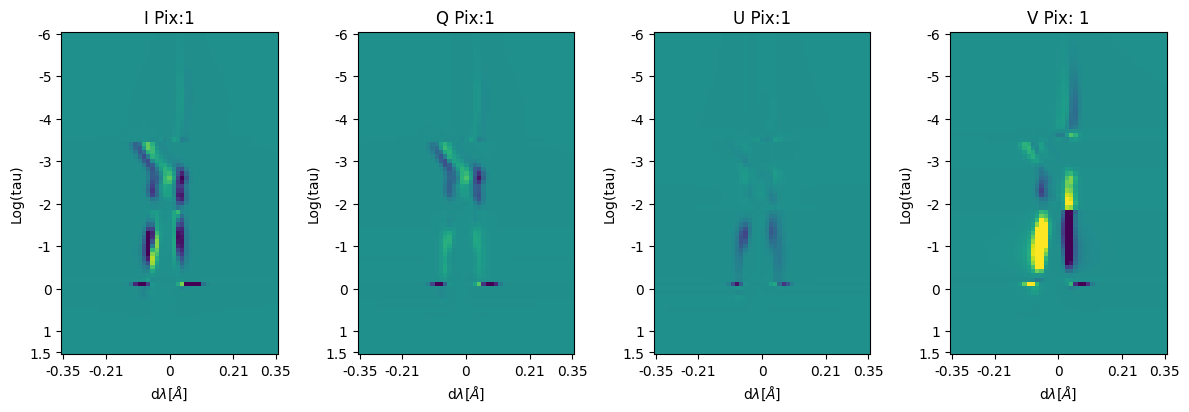

2 0


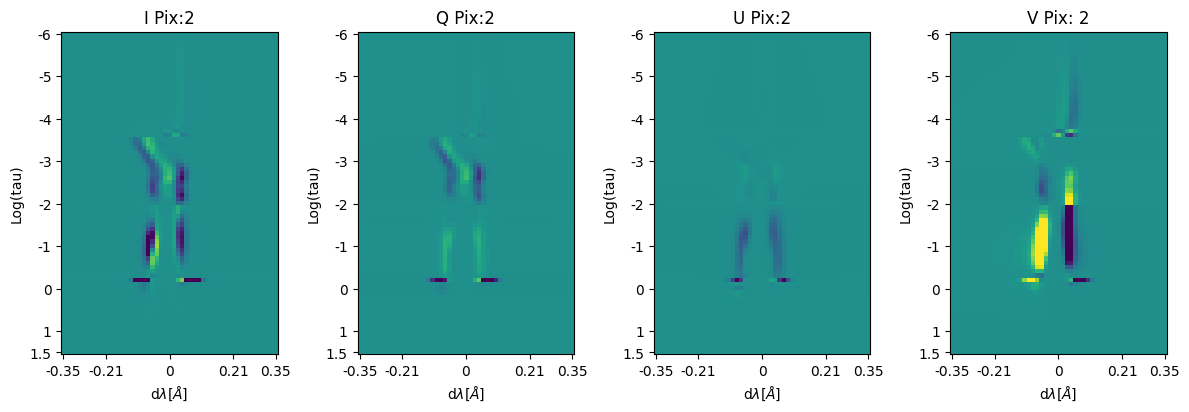

3 0


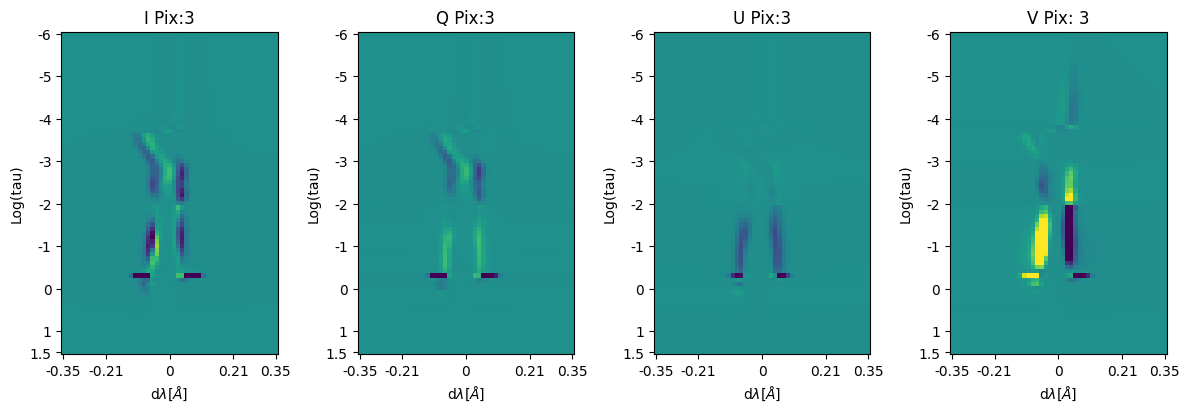

4 0


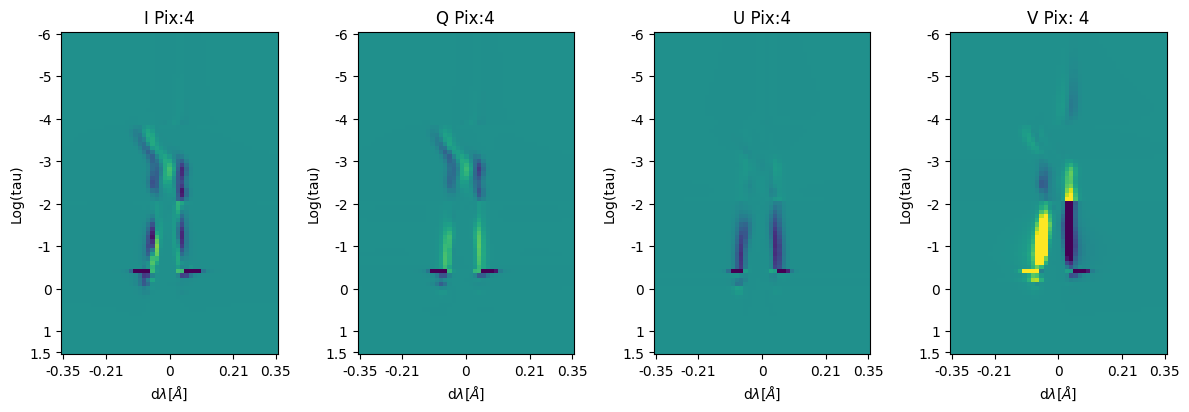

In [140]:
s=['I','Q','U','V']
cmax=0.5e-4

tau_range = np.linspace(-6,1.5,76)
tickloc=[0,5,15,25,35,45,55,65,75]
labels=['1.5','1','0','-1','-2','-3','-4','-5','-6']

xtickloc=[0,10,25,40,50]
xlabels=['-0.35','-0.21','0','0.21','0.35']
for i in range(5):
    x=i//36
    y=i%36
    print(y,x)
    plt.figure(figsize=(12,5))
    plt.subplot(141)
    plt.imshow(output[7,y,x,0,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'I Pix:{i}')

    plt.subplot(142)
    plt.imshow(output[7,y,x,1,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'Q Pix:{i}')

    plt.subplot(143)
    plt.imshow(output[7,y,x,2,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'U Pix:{i}')

    plt.subplot(144)
    plt.imshow(output[7,y,x,3,:,:],origin="lower",vmin=-cmax,vmax=cmax)
    plt.yticks(ticks=tickloc,labels=labels)
    plt.xticks(ticks=xtickloc,labels=xlabels)
    plt.ylabel('Log(tau)')
    plt.xlabel(r'd$\lambda [\AA]$')
    plt.title(f'V Pix: {i}')
    plt.tight_layout()
    plt.show()

In [141]:
output[7,:,:,3,:,:].shape

(36, 36, 76, 51)

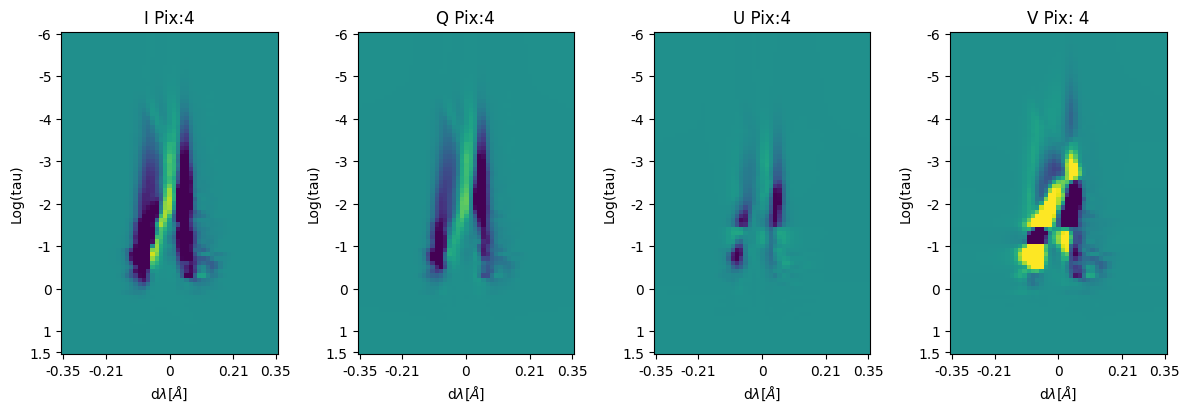

In [142]:
# avg over all pixels
avgd=output[7,:,:,:,:,:].mean(axis=(0,1))
cmax=1e-5
plt.figure(figsize=(12,5))
plt.subplot(141)
plt.imshow(avgd[0],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'I Pix:{i}')

plt.subplot(142)
plt.imshow(avgd[1],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'Q Pix:{i}')

plt.subplot(143)
plt.imshow(avgd[2],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'U Pix:{i}')

plt.subplot(144)
plt.imshow(avgd[3],origin="lower",vmin=-cmax,vmax=cmax)
plt.yticks(ticks=tickloc,labels=labels)
plt.xticks(ticks=xtickloc,labels=xlabels)
plt.ylabel('Log(tau)')
plt.xlabel(r'd$\lambda [\AA]$')
plt.title(f'V Pix: {i}')
plt.tight_layout()
plt.show()

## following Borrero et al 2014

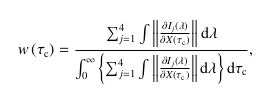

In [202]:
avg_xy=output[7,:5,:5,:,:,:].mean(axis=(0,1))
int_wave=np.sum(np.abs(avg_xy)*0.014,axis=-1)
int_tau=np.sum(int_wave*0.1,axis=-1)
weighted_response_function=int_wave/int_tau[...,np.newaxis]

In [144]:
weighted_response_function.shape

(4, 76)

In [145]:
int_wave.shape

(4, 76)

In [146]:
int_tau[...,np.newaxis].shape

(4, 1)

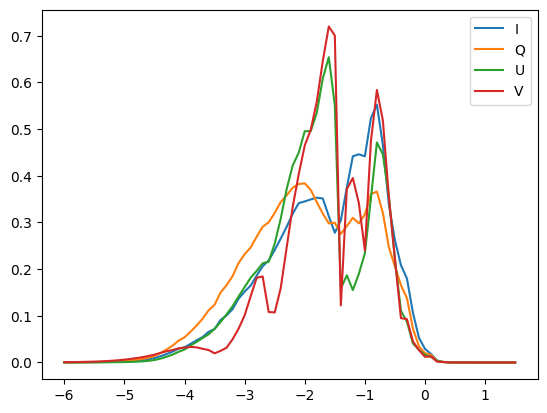

In [148]:
plt.figure()
plt.plot(tau_range[::-1],weighted_response_function[0,:],label='I')
plt.plot(tau_range[::-1],weighted_response_function[1,:],label='Q')
plt.plot(tau_range[::-1],weighted_response_function[2,:],label='U')
plt.plot(tau_range[::-1],weighted_response_function[3,:],label='V')
plt.legend()

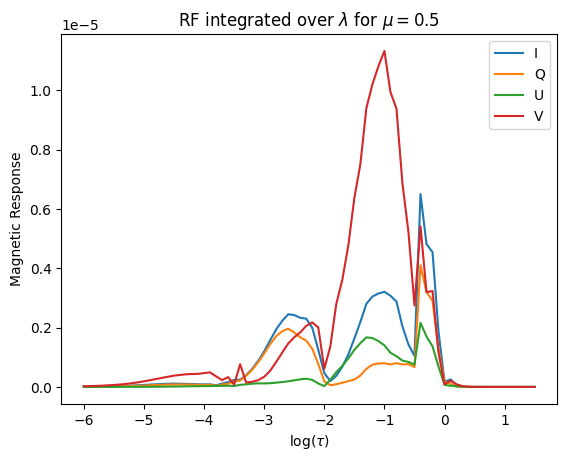

In [204]:
plt.figure()
plt.plot(tau_range[::-1],int_wave[0,:],label='I')
plt.plot(tau_range[::-1],int_wave[1,:],label='Q')
plt.plot(tau_range[::-1],int_wave[2,:],label='U')
plt.plot(tau_range[::-1],int_wave[3,:],label='V')
plt.xlabel(r'$\log(\tau)$')
plt.ylabel('Magnetic Response')
plt.title(r'RF integrated over $\lambda$ for $\mu=0.5$')
plt.legend()
plt.savefig('./plots/rf_mu05n.png',dpi=300,bbox_inches='tight')

In [156]:
avg_xy=output[7,:10,:10,:,:,:].mean(axis=(0,1))
int_wave=np.sum(np.abs(avg_xy)*0.014,axis=-1)
int_tau=np.sum(int_wave*0.1,axis=-1)
weighted_response_function=int_wave/int_tau[...,np.newaxis]

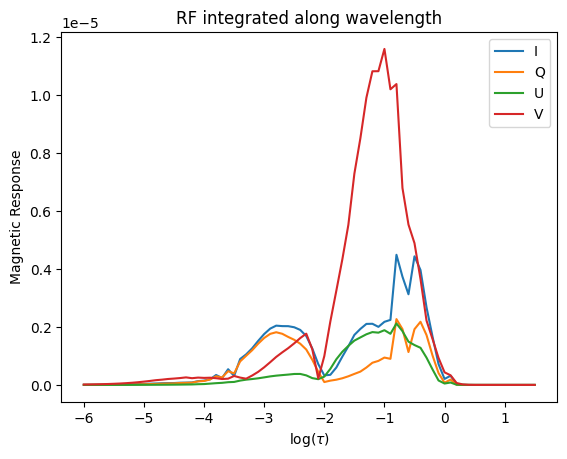

In [157]:
plt.figure()
plt.plot(tau_range[::-1],int_wave[0,:],label='I')
plt.plot(tau_range[::-1],int_wave[1,:],label='Q')
plt.plot(tau_range[::-1],int_wave[2,:],label='U')
plt.plot(tau_range[::-1],int_wave[3,:],label='V')
plt.xlabel(r'$\log(\tau)$')
plt.ylabel('Magnetic Response')
plt.title('RF integrated along wavelength')
plt.legend()